# Python & Data Science Lab — Solutions Notebook
This notebook contains solutions for **Exercise 1, 2, 3**.

> Notes:
> - Code is written to be clear and reusable (functions where possible).
> - Run cells top-to-bottom.


## Setup

In [16]:
# Core libs
import random
import time

# Numeric / plotting / data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Exercise 1

### Exercise 1.1 — Print the pattern (few loops)
We implement a function that prints the pattern using **one loop** by iterating over a prebuilt sequence of row sizes.

Target shape (example for n=3):

```
X
X X
X X X
X X
X
```

In [17]:
def print_x_pattern(n: int = 3, char: str = "X") -> None:
    """Prints an increasing then decreasing pattern of X's.

    Example (n=3):
    X
    X X
    X X X
    X X
    X
    """
    if n <= 0:
        raise ValueError("n must be > 0")

    # Build row sizes: 1..n then n-1..1
    row_sizes = list(range(1, n + 1)) + list(range(n - 1, 0, -1))

    # Single loop to print all rows
    for k in row_sizes:
        print(" ".join([char] * k))


# Demo
print_x_pattern(5)


X
X X
X X X
X X X X
X X X X X
X X X X
X X X
X X
X


### Exercise 1.2 — Sum digits in a string
We sum **all digit characters** found in the string. If the string contains `45`, we treat it as `4 + 5`.

In [18]:
input_str = "n45as29@#8ss6"

def sum_digits_in_string(s: str) -> int:
    total = 0
    for ch in s:
        if "0" <= ch <= "9":   # avoids using str.isdigit() if you want to be strict
            total += ord(ch) - ord("0")
    return total

print(sum_digits_in_string(input_str))  # expected: 4+5+2+9+8+6 = 34


34


### Exercise 1.3 — Convert integer to binary string (no `bin()`)
We repeatedly divide by 2 and collect remainders. Handles 0 and negative numbers.

In [19]:
def int_to_binary_string(n: int) -> str:
    if n == 0:
        return "0"

    sign = "-" if n < 0 else ""
    n = abs(n)

    bits = []
    while n > 0:
        bits.append(str(n % 2))
        n //= 2

    # bits collected least-significant first
    return sign + "".join(reversed(bits))


for x in [0, 1, 2, 5, 10, 31, -13]:
    print(x, "->", int_to_binary_string(x))


0 -> 0
1 -> 1
2 -> 10
5 -> 101
10 -> 1010
31 -> 11111
-13 -> -1101


### Exercise 1.4 — Fibonacci numbers below a threshold
Return a list of Fibonacci numbers strictly **lower** than `upper_threshold`.

We implement:
- Iterative approach
- Recursion (simple)
- Memoization

In [20]:
def fibonacci_iterative(upper_threshold: int) -> list[int]:
    if upper_threshold <= 0:
        return []

    fibs = [0]
    a, b = 0, 1

    # Include 1's etc as long as < threshold
    while b < upper_threshold:
        fibs.append(b)
        a, b = b, a + b

    return fibs


def fibonacci_recursive(upper_threshold: int) -> list[int]:
    """Recursion approach: generate values recursively until threshold reached."""
    if upper_threshold <= 0:
        return []

    result = [0]

    def rec(a: int, b: int) -> None:
        if b >= upper_threshold:
            return
        result.append(b)
        rec(b, a + b)

    rec(0, 1)
    return result


def fibonacci_memoized(upper_threshold: int) -> list[int]:
    """Memoization: cache fib(n) values and build list until threshold."""
    if upper_threshold <= 0:
        return []

    memo = {0: 0, 1: 1}

    def fib(n: int) -> int:
        if n in memo:
            return memo[n]
        memo[n] = fib(n - 1) + fib(n - 2)
        return memo[n]

    out = []
    i = 0
    while True:
        val = fib(i)
        if val >= upper_threshold:
            break
        out.append(val)
        i += 1
    return out


print(fibonacci_iterative(10))
print(fibonacci_recursive(10))
print(fibonacci_memoized(10))


[0, 1, 1, 2, 3, 5, 8]
[0, 1, 1, 2, 3, 5, 8]
[0, 1, 1, 2, 3, 5, 8]


### Exercise 1.5 — Rock, Paper, Scissors
Basic: play **one round**.
Advanced: play **n rounds** with score tracking.

Rules:
- rock beats scissors
- scissors beats paper
- paper beats rock

In [21]:
def rock_paper_scissors() -> None:
    moves = ("rock", "paper", "scissors")
    computer = random.choice(moves)

    user = input("Your move (rock/paper/scissors): ").strip().lower()
    if user not in moves:
        print("Invalid move.")
        return

    print(f"Computer: {computer}")
    if user == computer:
        print("It is a tie")
    elif (user == "rock" and computer == "scissors") or          (user == "scissors" and computer == "paper") or          (user == "paper" and computer == "rock"):
        print("You win")
    else:
        print("You lose")


def rock_paper_scissors_n_rounds(n: int = 3) -> None:
    if n <= 0:
        raise ValueError("n must be > 0")

    moves = ("rock", "paper", "scissors")
    user_score = 0
    comp_score = 0

    for rnd in range(1, n + 1):
        computer = random.choice(moves)
        user = input(f"[Round {rnd}/{n}] Your move (rock/paper/scissors): ").strip().lower()

        if user not in moves:
            print("Invalid move -> round counts as lost.")
            comp_score += 1
        else:
            if user == computer:
                pass  # tie
            elif (user == "rock" and computer == "scissors") or                  (user == "scissors" and computer == "paper") or                  (user == "paper" and computer == "rock"):
                user_score += 1
            else:
                comp_score += 1

        print(f"Computer: {computer} | Score -> You: {user_score}, Computer: {comp_score}")

    if user_score > comp_score:
        print("Final result: You win")
    elif user_score < comp_score:
        print("Final result: You lose")
    else:
        print("Final result: It is a tie")


# Uncomment to play:
# rock_paper_scissors()
# rock_paper_scissors_n_rounds(5)


## Exercise 2 — NumPy

### Exercise 2.1 — Arrays and thresholding (loop vs vectorized)

In [22]:
import numpy as np
import time

def create_array_nxn(n: int) -> np.ndarray:
    if not isinstance(n, int) or n <= 0:
        raise ValueError("n must be a positive integer")
    # Values from n^2 - 1 down to 0, shaped into n x n
    return np.arange(n*n - 1, -1, -1).reshape(n, n)


def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
    out = arr.copy()
    # Loop over indices
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            if out[i, j] < threshold:
                out[i, j] = 0
    return out


def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
    out = arr.copy()
    out[out < threshold] = 0
    return out


def compare_performance(n: int, threshold: int) -> None:
    arr = create_array_nxn(n)

    t0 = time.time()
    _ = apply_threshold_loop(arr, threshold)
    t1 = time.time()

    t2 = time.time()
    _ = apply_threshold_vectorized(arr, threshold)
    t3 = time.time()

    print(f"n={n}, threshold={threshold}")
    print(f"Loop approach:        {t1 - t0:.6f} seconds")
    print(f"Vectorized approach:  {t3 - t2:.6f} seconds")


# Quick demo
A = create_array_nxn(4)
print(A)

print(apply_threshold_loop(A, 5))
print(apply_threshold_vectorized(A, 5))

compare_performance(500, 100000)  # adjust n if needed on your machine


[[15 14 13 12]
 [11 10  9  8]
 [ 7  6  5  4]
 [ 3  2  1  0]]
[[15 14 13 12]
 [11 10  9  8]
 [ 7  6  5  0]
 [ 0  0  0  0]]
[[15 14 13 12]
 [11 10  9  8]
 [ 7  6  5  0]
 [ 0  0  0  0]]
n=500, threshold=100000
Loop approach:        0.080738 seconds
Vectorized approach:  0.002221 seconds


### Exercise 2.2 — Digi display
We map each digit to a 5×3 array, then concatenate them horizontally and display with `imshow`.

Advanced: supports negative numbers and floats (includes `-` and `.`).

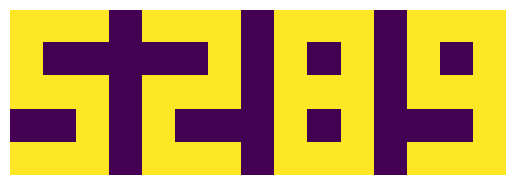

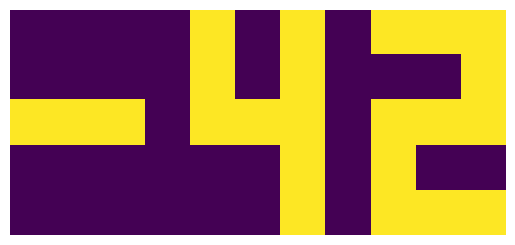

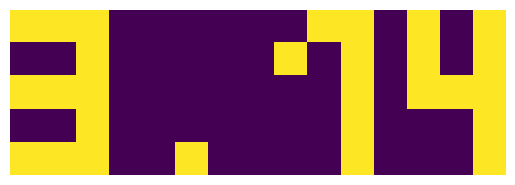

In [23]:
numbs = {
    "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]),
    "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]),
    "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
    "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]),
    "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
    "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]),
    "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]),
    "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]),
    "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
    "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]),
}

# Extra symbols for advanced part
minus_symbol = np.array([[0, 0, 0],
                         [0, 0, 0],
                         [1, 1, 1],
                         [0, 0, 0],
                         [0, 0, 0]])

dot_symbol = np.array([[0, 0, 0],
                       [0, 0, 0],
                       [0, 0, 0],
                       [0, 0, 0],
                       [0, 1, 0]])

symbols = {"-": minus_symbol, ".": dot_symbol}

def show_in_digi(input_integer) -> None:
    s = str(input_integer)

    # spacing column between characters
    spacer = np.zeros((5, 1), dtype=int)

    parts = []
    for ch in s:
        if ch in numbs:
            parts.append(numbs[ch])
        elif ch in symbols:
            parts.append(symbols[ch])
        else:
            raise ValueError(f"Unsupported character in input: {ch}")

        parts.append(spacer)

    # remove last spacer
    if parts:
        parts = parts[:-1]

    display_arr = np.concatenate(parts, axis=1)

    plt.figure()
    plt.imshow(display_arr, interpolation="nearest")
    plt.axis("off")
    plt.show()


# Demo
show_in_digi(5289)
show_in_digi(-42)
show_in_digi(3.14)


## Exercise 3 — California Housing Dataset (pandas)
We use `sklearn.datasets.fetch_california_housing(as_frame=True)` to load the dataset as a pandas DataFrame.

If you are on Google Colab, scikit-learn is usually available. If not, install it with:
```
!pip install scikit-learn
```

In [24]:
from sklearn.datasets import fetch_california_housing

cal = fetch_california_housing(as_frame=True)
df = cal.frame  # contains features + target

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 3.1 — What does `dataset.describe()` do?

In [25]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 3.2 — Display all rows where `total_bedrooms` > 310
In this dataset, the column name is **`AveBedrms`** (average bedrooms per household), not `total_bedrooms`.

If your course/Colab dataset has `total_bedrooms`, use that name instead.

Here we follow the task intent and filter by `AveBedrms > 310` (will likely return few/none because it's an average).

In [26]:
df[df["AveBedrms"] > 310]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


### 3.3 — Drop first and last row

In [27]:
df_dropped = df.iloc[1:-1].copy()
df_dropped.shape, df.shape


((20638, 9), (20640, 9))

### 3.4 — Mean of `Households`
Plot: x-axis = ID (index), y-axis = `Households` as dots, and mean as a horizontal line.

In [28]:
households_mean = df_dropped["AveOccup"].mean()
households_mean

np.float64(3.0707021006918853)

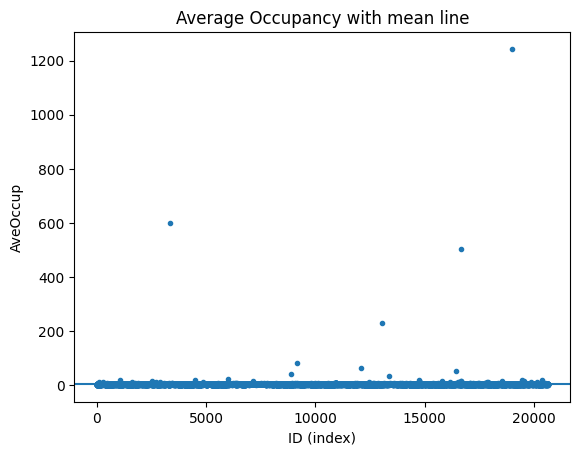

In [30]:
plt.figure()
plt.plot(df_dropped.index, df_dropped["AveOccup"], marker=".", linestyle="None")
plt.axhline(households_mean)
plt.xlabel("ID (index)")
plt.ylabel("AveOccup")
plt.title("Average Occupancy with mean line")
plt.show()

### 3.5 — Check NaNs and replace with dataset mean (if any)

In [31]:
nan_counts = df_dropped.isna().sum()
nan_counts[nan_counts > 0]


,0


In [32]:
# Replace NaNs with arithmetic mean of each column (only affects columns with NaNs)
df_filled = df_dropped.copy()
col_means = df_filled.mean(numeric_only=True)
df_filled = df_filled.fillna(col_means)

# Verify
df_filled.isna().sum().sum()


np.int64(0)

### 3.6 — Plot latitude vs longitude
Task says lat on x-axis and long on y-axis. Dataset columns: `Latitude`, `Longitude`.

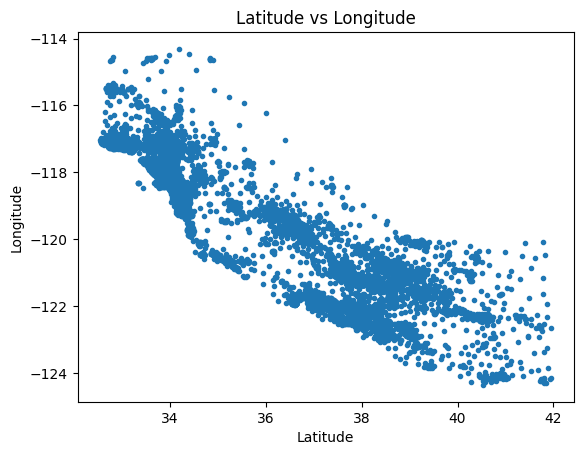

In [33]:
plt.figure()
plt.plot(df_filled["Latitude"], df_filled["Longitude"], marker=".", linestyle="None")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude")
plt.show()


### 3.7 — Min-max normalization for two arbitrary columns
We pick `MedInc` and `AveRooms` (you can change).

In [34]:
def min_max_normalize(series: pd.Series) -> pd.Series:
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return series * 0  # all same value
    return (series - min_val) / (max_val - min_val)

df_norm = df_filled.copy()
for col in ["MedInc", "AveRooms"]:
    df_norm[col] = min_max_normalize(df_norm[col])

df_norm[["MedInc", "AveRooms"]].describe()


,MedInc,AveRooms
count,20638.000000,20638.000000
mean,0.232454,0.032487
std,0.131007,0.017540
min,0.000000,0.000000
25%,0.142333,0.025482
50%,0.209301,0.031070
75%,0.292622,0.036907
max,1.000000,1.000000


### 3.8 — Correlation matrix of all columns

In [35]:
corr = df_filled.corr(numeric_only=True)
corr


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119207,0.326873,-0.062027,0.004945,0.018773,-0.079882,-0.015060,0.687989
HouseAge,-0.119207,1.000000,-0.153320,-0.077737,-0.296221,0.013192,0.011209,-0.108186,0.105492
AveRooms,0.326873,-0.153320,1.000000,0.847636,-0.072186,-0.004851,0.106375,-0.027504,0.151902
AveBedrms,-0.062027,-0.077737,0.847636,1.000000,-0.066206,-0.006181,0.069724,0.013341,-0.046684
Population,0.004945,-0.296221,-0.072186,-0.066206,1.000000,0.069862,-0.108746,0.099717,-0.024555
AveOccup,0.018773,0.013192,-0.004851,-0.006181,0.069862,1.000000,0.002373,0.002471,-0.023738
Latitude,-0.079882,0.011209,0.106375,0.069724,-0.108746,0.002373,1.000000,-0.924675,-0.144217
Longitude,-0.015060,-0.108186,-0.027504,0.013341,0.099717,0.002471,-0.924675,1.000000,-0.045880
MedHouseVal,0.687989,0.105492,0.151902,-0.046684,-0.024555,-0.023738,-0.144217,-0.045880,1.000000


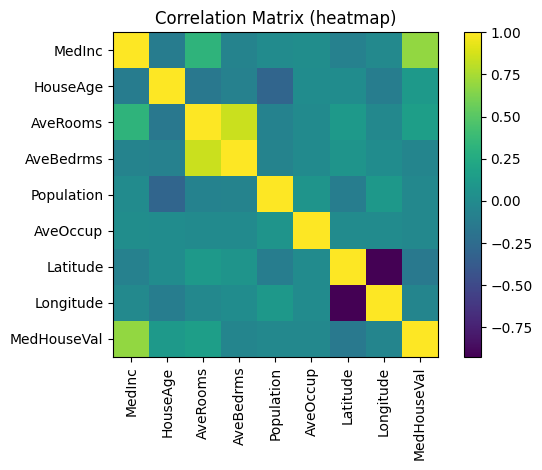

In [36]:
plt.figure()
plt.imshow(corr.values, interpolation="nearest")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Matrix (heatmap)")
plt.colorbar()
plt.tight_layout()
plt.show()
